# Mammographic Mass Data Set

This data set is used to detect the severity of breast cancer for performing further biopsies. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age.
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. 
To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead.
It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006.
Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. 
Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists.

ta set is derived from following URL
http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data
Number of Observations -961

Attribute Information:
1. BI-RADS assessment: 1 to 5 (ordinal) 
2. Age: patient's age in years (integer) 
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal)

Classification Variable is
Severity: benign=0 or malignant=1 (binominal)
Sources:

   (a) Original owners of database:
        Prof. Dr. R�diger Schulz-Wendtland
        Institute of Radiology, Gynaecological Radiology, University Erlangen-Nuremberg
        Universit�tsstra�e 21-23
        91054 Erlangen, Germany
        
   (b) Donor of database:
        Matthias Elter
        Fraunhofer Institute for Integrated Circuits (IIS)
        Image Processing and Medical Engineering Department (BMT) 
        Am Wolfsmantel 33
        91058 Erlangen, Germany
        matthias.elter@iis.fraunhofer.de
        (49) 9131-7767327 
     
   (c) Date received: October 2007

BIRADS or ‘BI-RADS stands for Breast Imaging Reporting and Data System and was established by the American College of Radiology.
BI-RADS is a scheme for putting the findings from mammogram screening (for breast cancer diagnosis) into a small number of well-defined categories. Although BIRADS started out for use with breast screening mammography, it was later adapted for use with Magnetic Resonance Imaging (MRI) and breast ultrasound (US) as well.



In [2]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"
Mamm = pd.read_csv(url, header=None,sep=',',na_values=["?"]) 
Mamm.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

# print first 5 rows with column names
print(Mamm.head())
# Check the data types
Mamm.dtypes
print("Printing column's information of the Dataframe")
print(Mamm.columns)



   BI-RADS   Age  Shape  Margin  Density  Severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
Printing column's information of the Dataframe
Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')


In [4]:
print("Printing COUNT information of the Dataframe")
print(Mamm.count())

# Find out the rows and columns of the data set
print("Shape of the Dataframe")
print(Mamm.shape)


Printing COUNT information of the Dataframe
BI-RADS     959
Age         956
Shape       930
Margin      913
Density     885
Severity    961
dtype: int64
Shape of the Dataframe
(961, 6)


#As a part of Milestone2, clean data set is prepared after imputing missing values and normalization is done on 2 columns.Dummy variables are created for shape and Margin

In [5]:
#read in MammographicCleanData dataset 
Mamm = pd.read_csv('C:\\Users\\mayur_000\\Anaconda3\\Scripts\\Milestone3\\MammographicCleanData.csv',delimiter=",")

# print the first20 rows of data from the dataframe
Mamm.head(20)


,DensityNormal,BI-RADSNormal,Age,Severity,Age-Group,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated
0,0.666667,0.833333,67,1,4.0,1,0,0,0,0,0,1
1,0.666667,0.666667,43,1,3.0,0,0,1,0,0,0,0
2,0.666667,0.833333,58,1,3.0,0,0,0,0,0,0,1
3,0.666667,0.666667,28,0,2.0,0,0,1,0,0,0,0
4,0.666667,0.833333,74,1,4.0,0,0,1,0,0,0,1
5,0.666667,0.666667,65,0,4.0,0,0,1,0,0,0,1
6,0.666667,0.666667,70,0,4.0,0,0,1,0,0,0,1
7,0.666667,0.833333,42,0,3.0,0,0,1,0,0,0,1
8,0.666667,0.833333,57,1,3.0,0,0,1,0,0,0,1
9,0.000000,0.833333,60,1,3.0,0,0,1,0,0,0,1


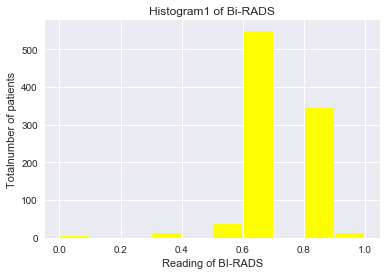

In [6]:
# Check the distribution of the "BI-RADS" column
from pandas.tools.plotting import scatter_matrix

import seaborn as sns
sns.set()
plt.xlabel("Reading of BI-RADS")
plt.ylabel("Totalnumber of patients")
plt.title("Histogram1 of Bi-RADS")
plt.legend()

plt.hist(Mamm.loc[:, "BI-RADSNormal"],rwidth=0.95,color='yellow')
plt.show()

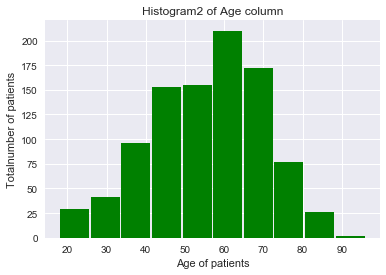

In [7]:
# Check the distribution of the "Age" column
# Corece to numeric and impute medians for Age column
Mamm.loc[:, "Age"] = pd.to_numeric(Mamm.loc[:, "Age"], errors='coerce')
HasNan = np.isnan(Mamm.loc[:,"Age"]) 
Mamm.loc[HasNan, "Age"] = np.nanmedian(Mamm.loc[:,"Age"])
sns.set()
plt.xlabel("Age of patients")
plt.ylabel("Totalnumber of patients")
plt.title("Histogram2 of Age column")
plt.legend()

plt.hist(Mamm.loc[:, "Age"],rwidth=0.95,color='green')
plt.show()

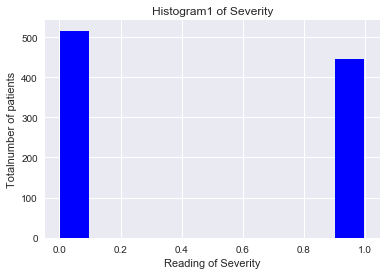

In [103]:
#Check the distribution of the "Severity" column
MammSeverity= Mamm.loc[:,'Severity']

plt.xlabel("Reading of Severity")
plt.ylabel("Totalnumber of patients")
plt.title("Histogram1 of Severity")
plt.legend()
plt.hist(Mamm.loc[:, "Severity"],rwidth=0.95,color='blue')
plt.show()



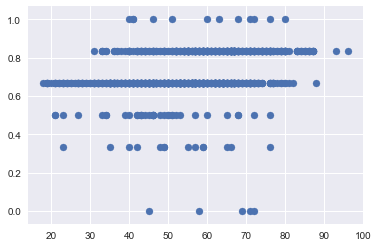

In [8]:
# Plot all the numeric columns against each other
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
#scatter_matrix(Mamm)
plt.scatter(Mamm['Age'],Mamm['BI-RADSNormal'])
plt.show()
#############
#_ = scatter_matrix(Mamm, c=Mamm.loc[:,"Severity"], figsize=[8,8], s=1000)


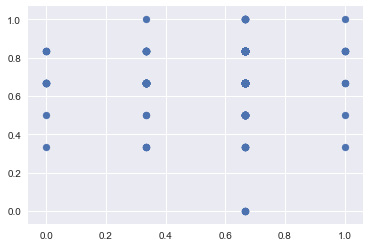

In [9]:
plt.scatter(Mamm['DensityNormal'],Mamm['BI-RADSNormal'])
plt.show()

From above scatter graph, we can confidently say that there is no linear corelation between Density and BIRADS and Age and BIRADS 

# Predict the severity of the mammography to perform biopsy
# This is a classification problem
Severity: benign=0 or malignant=1 (binominal)


In [10]:

#Consider BI-RADS and Desnity and Age these 3 columns as features
#Severity as tageget variable
# define X and y

feature_cols = ['BI-RADSNormal', 'Age', 'DensityNormal','Shape_lobular','Shape_oval','Shape_round','Margin_microlobulated','Margin_spiculated']
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = Mamm[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = Mamm.Severity


We will split the data set into Training and Testing sets
Spliting data in 80% training and 20% testing set

In [11]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split

# Spliting data in 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training sample having dimesions===")
print(X_train.shape)
print("Testing sample having dimensions=====")
print(X_test.shape)

Training sample having dimesions===
(768, 8)
Testing sample having dimensions=====
(193, 8)


C:\Users\mayur_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


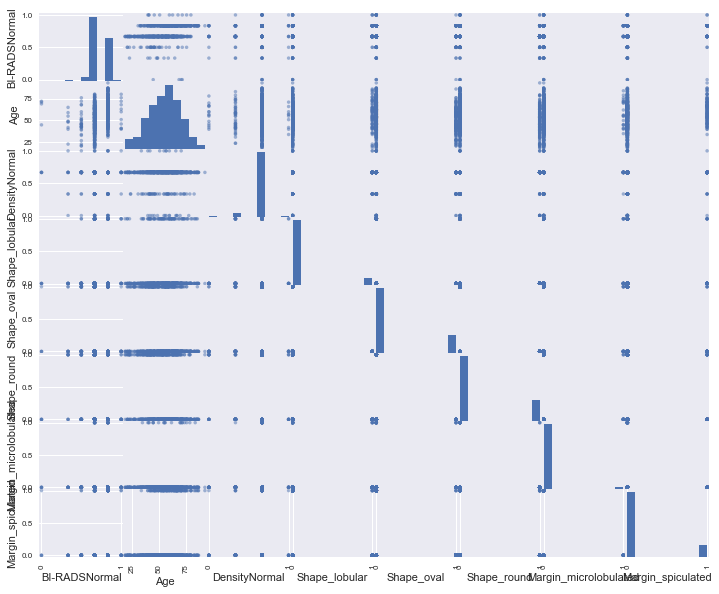

In [12]:
pd.plotting.scatter_matrix(X_train, figsize=(12,10))
plt.show()

# Fit and apply Predictive models
Here Following 4 models are chosen
1.Logistic Regression
2.K nearest neighbor
3.Descion tree
4 Support Vector Matrix

In [31]:
# Fit and Test Logistic regression model#Logistic regression model
# instantiate model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# fit model
logreg.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print(y_pred_class)


[1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 0]


In [ ]:
### Fit and apply Knearest neighbors model

In [32]:
# import sklearn KNNclassifier module
from sklearn.neighbors import KNeighborsClassifier 
# instantiate model
knn= KNeighborsClassifier()
# fit model
knn.fit(X_train,y_train)
#make predictions
y_knn_pred_class= knn.predict(X_test)
print(y_knn_pred_class)

[1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 1 1 1 1 0]


In [ ]:
### Fit and apply Support vector machine classifier

In [33]:
#import sklearn SVC module 
from sklearn.svm import SVC
print ('\n\nSupport Vector Machine classifier\n')
# instantiate model
svm = SVC()
# fit model
svm.fit(X_train, y_train)
# make predictions on test data set
y_svm_pred_class = svm.predict(X_test)
print (y_svm_pred_class)



Support Vector Machine classifier

[1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 1 0 1 1 1 0 0]


In [34]:
### Fit and apply Descion tree classifier#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#instentiate the model
dtc = DecisionTreeClassifier()
#fit model
dtc.fit(X_train,y_train)
# Make predictions on test data set
y_dtc_pred_class= dtc.predict(X_test)
print(y_dtc_pred_class)

[1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0]


0.795918367347
0.755102040816
0.642857142857
0.704081632653


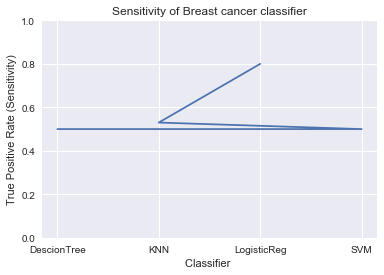

In [35]:
#Calculate classification accuracy
from sklearn import metrics
# Classification accuracy of logistic regression
print(metrics.accuracy_score(y_test,y_pred_class))

# Classification accuracy of KNN
print(metrics.accuracy_score(y_test,y_knn_pred_class))

# Classification accuracy of Decision tree
print(metrics.accuracy_score(y_test,y_dtc_pred_class))

# Classification accuracy of support vector Matrix
print(metrics.accuracy_score(y_test,y_svm_pred_class))


0.818652849741
0.766839378238
0.725388601036
0.735751295337


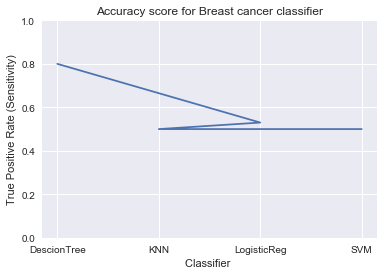

In [36]:
Acc_score = [0.80,0.53,0.50,0.50]
Classifier=['DescionTree','LogisticReg','KNN','SVM']
plt.plot(Classifier,Acc_score)
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Accuracy score for Breast cancer classifier')
plt.xlabel('Classifier ')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

From above graph,we can see the DescionTree has higest accuracy score

In [78]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools
from IPython.display import display
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "orange")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def compute_cnf(classifier,x_test,y_test):
    cnf_matrix = confusion_matrix(classifier.predict(x_test),y_test)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],
                      title='Confusion matrix, without normalization')

    plt.show()

    
from sklearn.metrics import f1_score as fscorer

def f1_score(classifier,x_test,y_test):
    return fscorer(classifier.predict(X_test),y_test)

[[80 15]
 [20 78]]
True positives are
78
True Negatives are
80
False positives are
15
False negatives are
20
0.818652849741
0.181347150259
0.795918367347
0.838709677419
0.816753926702
0.818652849741
Confusion matrix, without normalization
[[80 20]
 [15 78]]


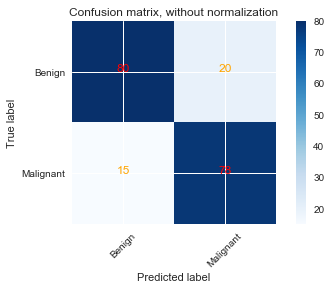

In [87]:
#Calculate confusion matrix for logistic regression
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

print("True positives are") 
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]
print(FN)

print(accuracy_score(y_test, y_pred_class))

# calculate error rate
print(1 - accuracy_score(y_test, y_pred_class))

#recall 
print(recall_score(y_test, y_pred_class))

#precision
print(precision_score(y_test, y_pred_class))

#f1_score
print(f1_score(y_test, y_pred_class))

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)



[[77 18]
 [35 63]]
True positives are
63
True Negatives are
77
False positives are
18
False negatives are
35
0.274611398964
0.642857142857
0.777777777778
0.703910614525
0.725388601036
Confusion matrix, without normalization
[[77 35]
 [18 63]]


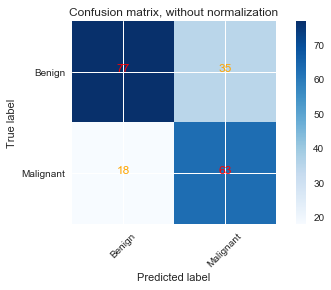

In [79]:
#Calculate confusion matrix for for Decesion tree
from sklearn.metrics import *


confusion = confusion_matrix(y_test, y_dtc_pred_class)
print(confusion)

print("True positives are") 
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]
print(FN)

# calculate error rate
print(1 - accuracy_score(y_test, y_dtc_pred_class))

#recall 
print(recall_score(y_test, y_dtc_pred_class))

#precision
print(precision_score(y_test, y_dtc_pred_class))

#f1_score
print(f1_score(y_test, y_dtc_pred_class))

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

[[74 21]
 [24 74]]
True positives are
74
True Negatives are
74
False positives are
21
False negatives are
24
0.766839378238
Confusion matrix, without normalization
[[74 24]
 [21 74]]


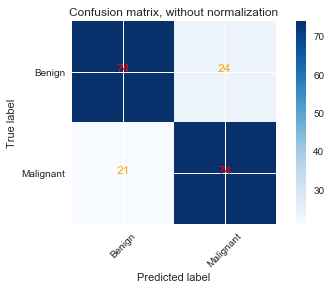

In [75]:
#Calculate confusion matrix for K nearest mean
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_knn_pred_class)
print(confusion)

print("True positives are")
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]
print(FN)

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

[[73 22]
 [29 69]]
True positives are
69
True Negatives are
73
False positives are
22
False negatives are
0.735751295337
Confusion matrix, without normalization
[[73 29]
 [22 69]]


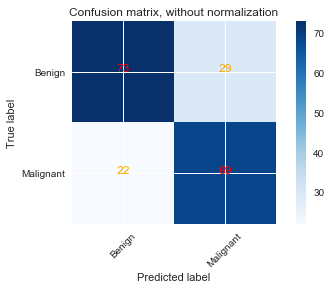

In [85]:

#Calculate confusion matrix for support vector Matrix
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_svm_pred_class)
print(confusion)

print("True positives are")
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]


classifier = SVC()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

In [100]:
#Calculate recall or sensitivity score
from sklearn import metrics
# Classification accuracy of logistic regression
print(metrics.recall_score(y_test,y_pred_class))

# Classification accuracy of KNN
print(metrics.recall_score(y_test,y_knn_pred_class))

# Classification accuracy of Decision tree
print(metrics.recall_score(y_test,y_dtc_pred_class))

# Classification accuracy of support vector Matrix
print(metrics.recall_score(y_test,y_svm_pred_class))


0.795918367347
0.755102040816
0.642857142857
0.704081632653


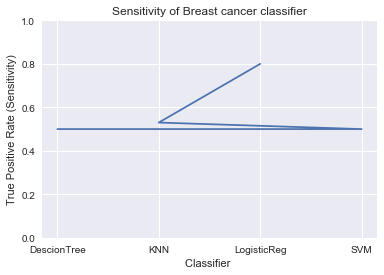

In [101]:
recall_score = [0.79,0.75,0.70,0.64]
Classifier=['LogisticReg','KNN','SVM','DescionTree']
plt.plot(Classifier,Acc_score)
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Sensitivity of Breast cancer classifier')
plt.xlabel('Classifier ')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

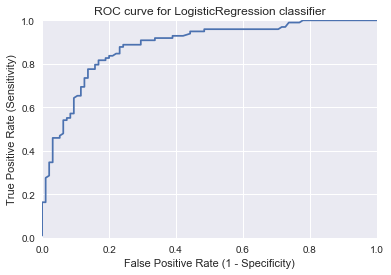

In [81]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for LogisticRegression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


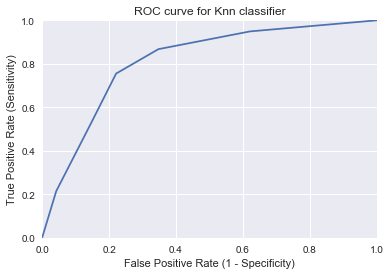

In [91]:
# store the predicted probabilities for class Knn
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [95]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

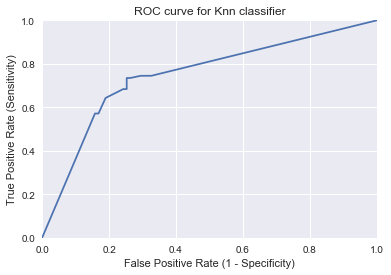

In [96]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

For Classifier  Logistic Regression :

TP rates: [ 0.   0.8  1. ]

FP rates: [ 0.    0.16  1.  ]

Probability thresholds: [2 1 0] 


For Classifier  Decision Tree :

TP rates: [ 0.    0.64  1.  ]

FP rates: [ 0.    0.19  1.  ]

Probability thresholds: [2 1 0] 


For Classifier  k Nearest Neighbors :

TP rates: [ 0.    0.76  1.  ]

FP rates: [ 0.    0.22  1.  ]

Probability thresholds: [2 1 0] 


For Classifier  Support vector :

TP rates: [ 0.   0.7  1. ]

FP rates: [ 0.    0.23  1.  ]

Probability thresholds: [2 1 0] 




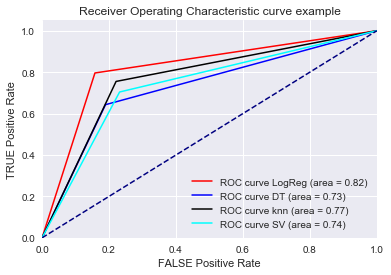

In [111]:
##ROC Analysis for all Classifiers
# Parameters for the AUC Plot
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC1 = 'red' # Line Color 
LC2 = 'blue' # Line Color 
LC3 = 'orange' # Line Color 
LC4 = 'black' # Line Color 
LC5 = 'cyan' # Line Color 
LC6 = 'green' # Line Color 

def getAUCScore(testdata,preddata,classifiername):
    fpr, tpr, th = roc_curve(testdata, preddata) # False Positive Rate, True Positive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    print ("For Classifier ",classifiername,":")
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2),'\n\n')
    return fpr, tpr, th, AUC

fpr_logreg, tpr_logreg, th_logreg, AUC_logreg = getAUCScore(y_test, y_pred_class, "Logistic Regression")
fpr_dt, tpr_dt, th_dt, AUC_dt = getAUCScore(y_test, y_dtc_pred_class, "Decision Tree")
fpr_knn, tpr_knn, th_knn, AUC_knn = getAUCScore(y_test, y_knn_pred_class, "k Nearest Neighbors")
fpr_sv, tpr_sv, th_sv, AUC_sv = getAUCScore(y_test, y_svm_pred_class, "Support vector")




#Plot the Results of ROC Analysis/AUC Score
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr_logreg, tpr_logreg, color=LC1,lw=LW, label='ROC curve LogReg (area = %0.2f)' % AUC_logreg)
plt.plot(fpr_dt, tpr_dt, color=LC2,lw=LW, label='ROC curve DT (area = %0.2f)' % AUC_dt)
plt.plot(fpr_knn, tpr_knn, color=LC4,lw=LW, label='ROC curve knn (area = %0.2f)' % AUC_knn)
plt.plot(fpr_sv, tpr_sv, color=LC5,lw=LW, label='ROC curve SV (area = %0.2f)' % AUC_sv)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for SVM
plt.legend(loc=LL)
plt.show()
####################


# Conclusion 
# In this problem false negatives (FN) should not acceptable. If patient is actually having malignant but it is predicted as non-cancerous, is most dangerous so our aim is to improve sensitivity. In other words we need to focus on sensitivity  Sensitivity means- When actual value is positive, how often it is predicted correctly? Also known as Recall rate.

What is best fit predictive model?
So in the graph above we can clearly see, logistic regression has the highest value of sensitivity. so it is best fit predictive model